In [60]:
from sklearn.datasets import *
from sklearn import tree
#from dtreeviz.trees import *
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
%config InlineBackend.figure_format = 'retina'

In [61]:
data=pd.read_excel('C:\\Users\\1\\Desktop\\Data_Final.xlsx')
test=pd.read_excel('C:\\Users\\1\\Desktop\\测试合金数据.xlsx')
data
#data.fillna(0, inplace=True)

,No.,Fe,Cr,Ni,Mo,W,N,Nb,Si,Mn,...,Ep,T,SO4,Cl,pH,Scan Rate,S_mix,diff_radius,geo_para,Material class
0,1,69.70,18.00,10.00,0.00,0.0,0.10,0.0,1.0,1.00,...,287.00,50.0,0.0,0.005133,7.8,10.0,7.728856,0.001031,6.861371,3
1,2,69.70,18.00,10.00,0.00,0.0,0.10,0.0,1.0,1.00,...,260.00,50.0,0.0,0.008556,7.8,10.0,7.728856,0.001031,6.861371,3
2,3,69.70,18.00,10.00,0.00,0.0,0.10,0.0,1.0,1.00,...,218.00,50.0,0.0,0.017112,7.8,10.0,7.728856,0.001031,6.861371,3
3,4,69.70,18.00,10.00,0.00,0.0,0.10,0.0,1.0,1.00,...,140.00,50.0,0.0,0.085558,7.8,10.0,7.728856,0.001031,6.861371,3
4,5,69.70,18.00,10.00,0.00,0.0,0.10,0.0,1.0,1.00,...,94.00,50.0,0.0,0.546000,8.2,10.0,7.728856,0.001031,6.861371,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,NaN,73.61,14.28,0.36,0.00,0.0,0.05,0.0,0.0,10.56,...,150.03,60.0,0.0,0.008550,6.5,0.3,6.816203,0.000301,7.877830,3
671,NaN,72.29,14.82,4.14,0.00,0.0,0.05,0.0,0.0,7.13,...,244.47,60.0,0.0,0.017100,6.5,0.3,7.518137,0.000422,7.625589,3
672,NaN,73.54,14.71,1.10,0.00,0.0,0.05,0.0,0.0,9.05,...,186.53,60.0,0.0,0.017100,6.5,0.3,7.021401,0.000412,7.617647,3
673,NaN,73.61,14.28,0.36,0.00,0.0,0.05,0.0,0.0,10.56,...,132.92,60.0,0.0,0.017112,6.5,0.3,6.816203,0.000301,7.877830,3


In [62]:
df=data
y= df['Ep'].copy()
x = df.drop('Ep', axis=1)
x=x.drop('No.', axis=1)
test_y=test['Ep'].copy()
test_x = test.drop('Ep', axis=1)
test_x = test_x.drop('No.', axis=1)
type(y)
x
test_x

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,S,Al,V,Ti,Co,Temp,SO4,Cl,pH,Scan_rate
0,66.32,18.0,11.00,3.00,0,0.10,0.00,0.022,0.47,1.07,...,0.0010,0.00,0.0000,0.000,0,25,0,0.6128,7,1
1,0.67,21.8,63.85,9.20,0,0.09,3.57,0.010,0.39,0.38,...,0.0020,0.04,0.0000,0.000,0,25,0,0.6128,7,1
2,58.40,18.5,0.00,0.66,0,0.63,0.00,0.010,0.30,21.50,...,0.0020,0.00,0.0000,0.000,0,25,0,0.6128,7,1
3,79.08,13.3,4.85,1.92,0,0.10,0.00,0.029,0.22,0.45,...,0.0012,0.00,0.0025,0.036,0,25,0,0.6128,7,1


In [63]:
featurename=x.columns.values
featurename
x.describe() #描述性统计
x.dtypes #变量类型描述

Fe                float64
Cr                float64
Ni                float64
Mo                float64
W                 float64
N                 float64
Nb                float64
Si                float64
Mn                float64
Cu                float64
Al                float64
V                 float64
Ti                float64
T                 float64
SO4               float64
Cl                float64
pH                float64
Scan Rate         float64
S_mix             float64
diff_radius       float64
geo_para          float64
Material class      int64
dtype: object

In [64]:
y

0       287.00
1       260.00
2       218.00
3       140.00
4        94.00
        ...   
670     150.03
671     244.47
672     186.53
673     132.92
674    1140.00
Name: Ep, Length: 675, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# 参数
model = xgb.XGBRegressor(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=300,
                        objective='reg:squarederror', 
                        booster='gbtree',
                        gamma=0.1,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.9,
                        reg_alpha=0,
                        reg_lambda=1,
                        )
MAE=[]
RMSE=[]
R2=[]
for i in range(10):
    # train an XGBoost model
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)
    model.fit(X_train,Y_train)
    # 对测试集进行预测
    ans = model.predict(X_test)
    mse = mean_squared_error(Y_test,ans)**0.5
    r2=r2_score(Y_test,ans)
    mae=mean_absolute_error(Y_test,ans)
    R2.append(r2)
    RMSE.append(mse)
    MAE.append(mae)

print('MAE:', MAE)
print('RMSE', RSME)
print('R2:',R2)
# mean
MAE_mean = np.mean(MAE)
RMSE_mean = np.mean(RMSE)
R2_mean = np.mean(R2)
# std
MAE_std = np.std(MAE,ddof=1)
RMSE_std = np.std(RMSE,ddof=1)
R2_std = np.std(R2,ddof=1)
print('mean:', MAE_mean,RMSE_mean,R2_mean)
print('std', MAE_std,RMSE_std,R2_std)

MAE: [127.45860768061057, 120.32312782380275, 95.46726187202735, 122.96958106875725, 112.30515817522264, 115.76956143373513, 122.59015729987112, 115.28043046279718, 101.51697724210395, 135.76306278497708]
RMSE [179.15291350563228, 180.91729878900753, 171.550802368043, 189.60547709922562, 193.26503263691197, 178.6337942491264, 185.23538877278975, 187.97362696530573, 188.61600583714113, 156.45428562453066]
R2: [0.7740970728050532, 0.7584904677331042, 0.8521855294925552, 0.7667110577335141, 0.8447390479427253, 0.7533627471877617, 0.8000306426984161, 0.7732614645141536, 0.8789279590267274, 0.7033613950811428]
mean: 116.9443925843905 190.76168700015393 0.7905167384215154
std 11.87540996428236 22.16520724383258 0.053527119011091494


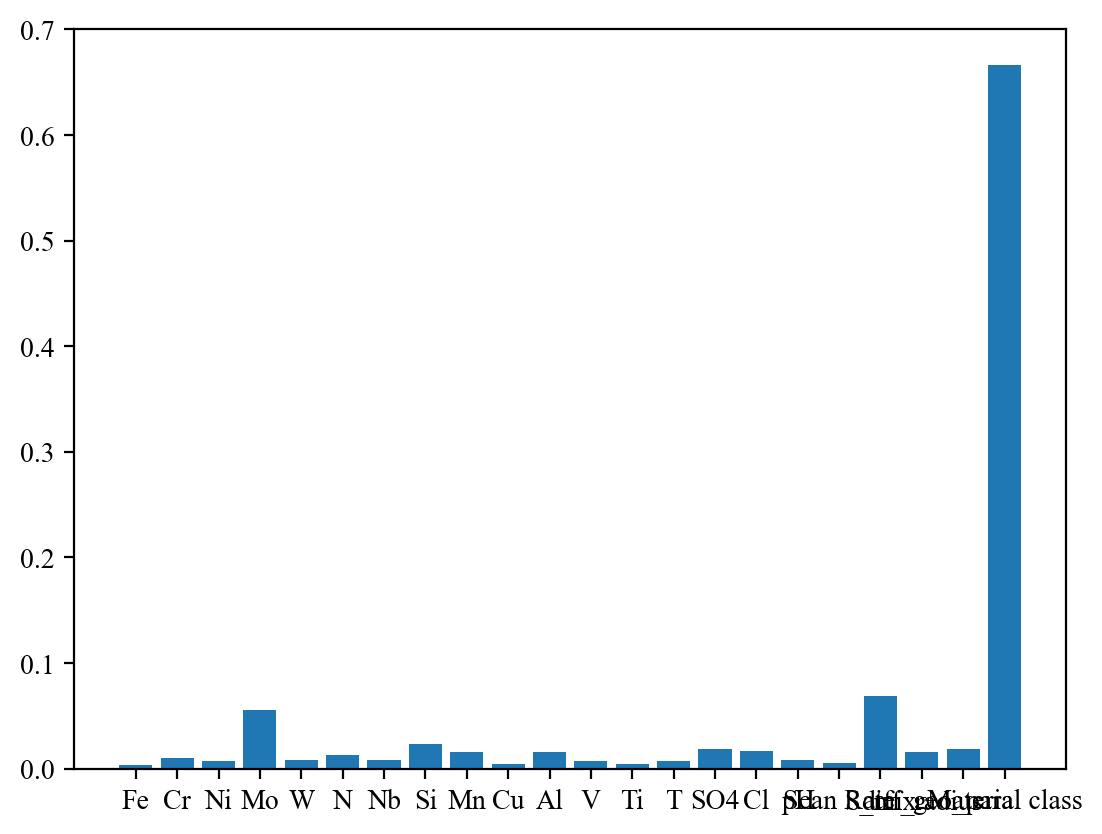

[0.00332713 0.01019232 0.00706423 0.05585194 0.00775012 0.0129931
 0.00771901 0.02286377 0.01543871 0.00447769 0.01522365 0.00756057
 0.00451143 0.00711391 0.0182729  0.01654414 0.00822031 0.00505041
 0.06908062 0.01595641 0.01806518 0.6667224 ]


In [104]:
# plot
from matplotlib import pyplot
pyplot.bar(featurename, model.feature_importances_)
pyplot.show()
print(model.feature_importances_)


In [105]:
#from sklearn.metrics import mean_absolute_percentage_error
#MAPE=mean_absolute_percentage_error(Y_test,ans)
MAE=mean_absolute_error(Y_test,ans)
#print("mae=:",MAPE)
print("mae=:",MAE)
#pred1 = model.predict(test_x)
#pred1

mae=: 135.76306278497708


In [106]:
test=pd.read_excel('C:\\Users\\1\\Desktop\\测试合金数据.xlsx')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


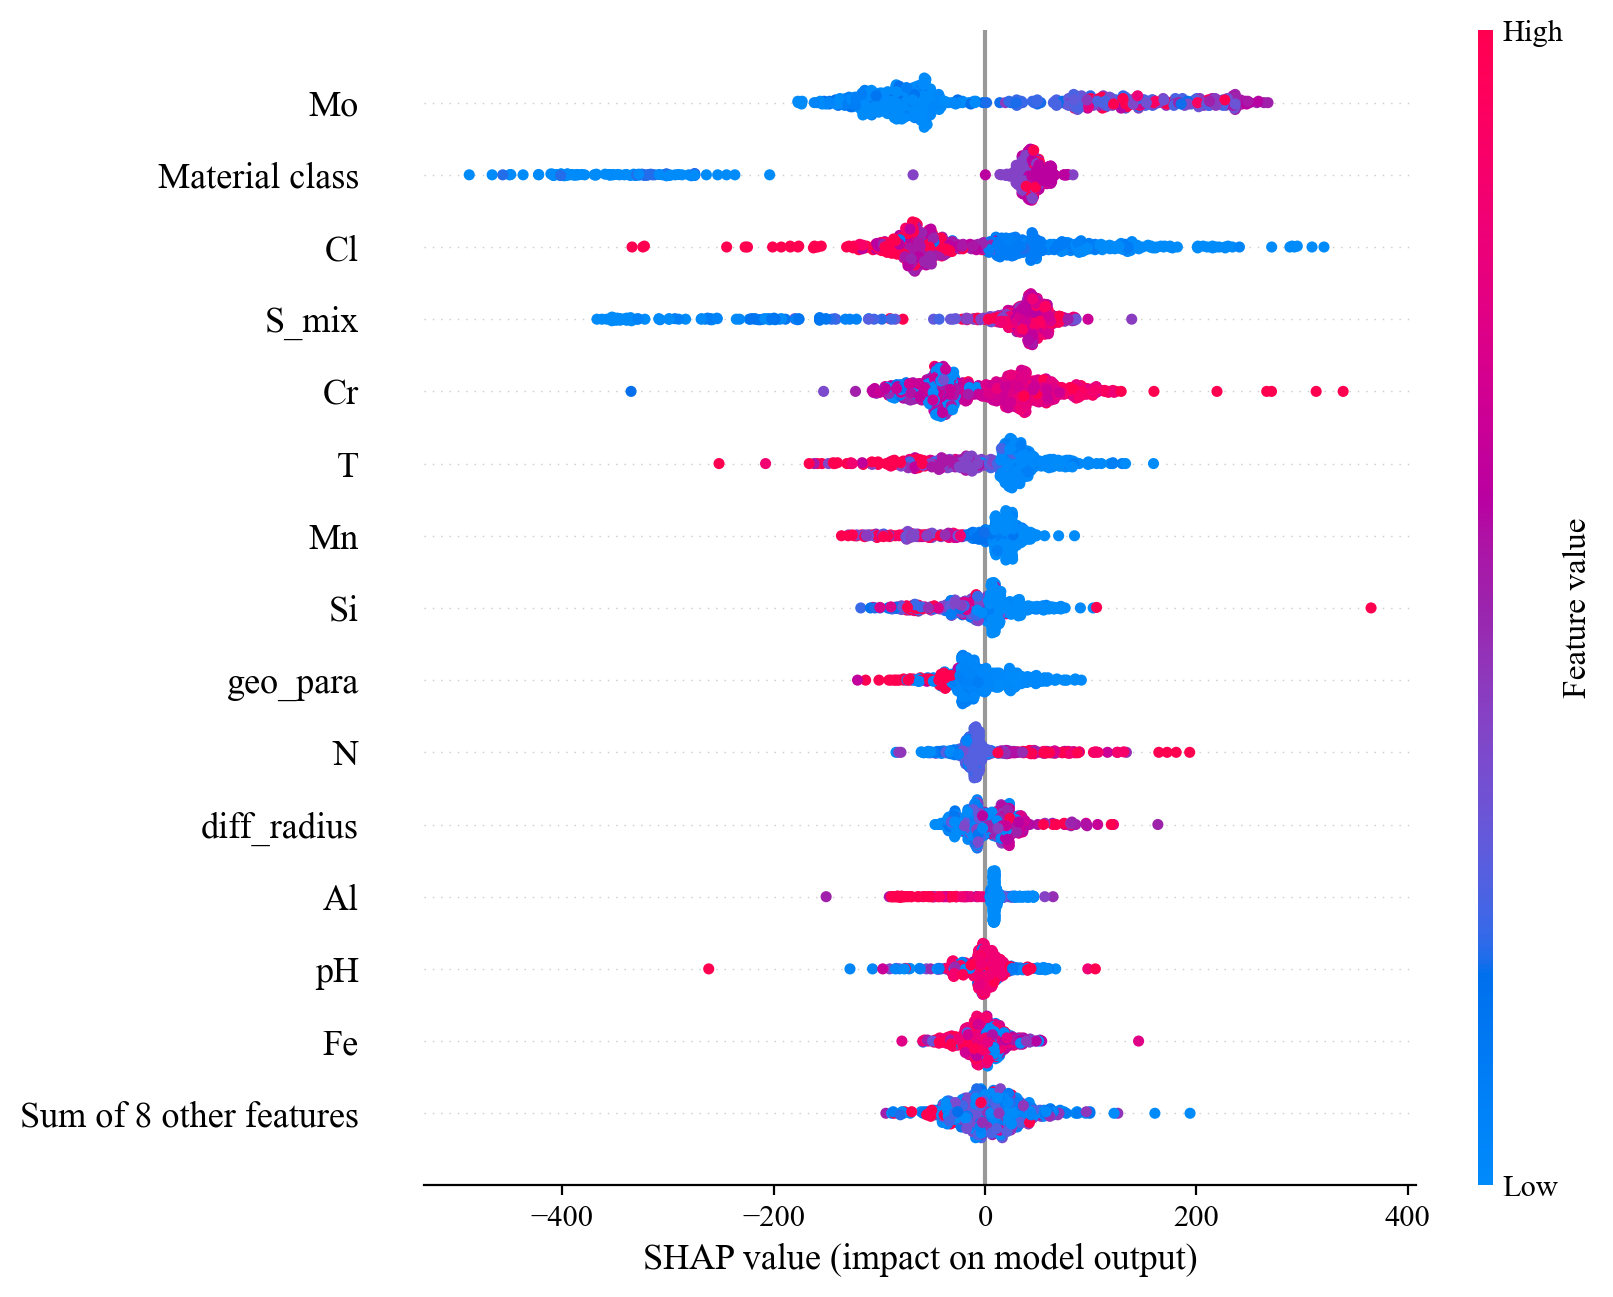

In [107]:
import seaborn as sns
import xgboost
import matplotlib.pyplot as plt
import shap
shap.initjs()
plt.rc('font',family='Times New Roman')
explainer = shap.Explainer(model,check_additivity=False, feature_perturbation='interventional')
shap_values = explainer(x)
# summarize the effects of all the features 
shap.plots.beeswarm(shap_values, 15,axis_color='#000000',show = False,)
#保存图片
#plt.savefig('C:\\Users\\1\\Desktop\\hap.png',dpi=400,bbox_inches = 'tight')

PyALE._ALE_generic:INFO: Continuous feature detected.


<Figure size 6000x6000 with 0 Axes>

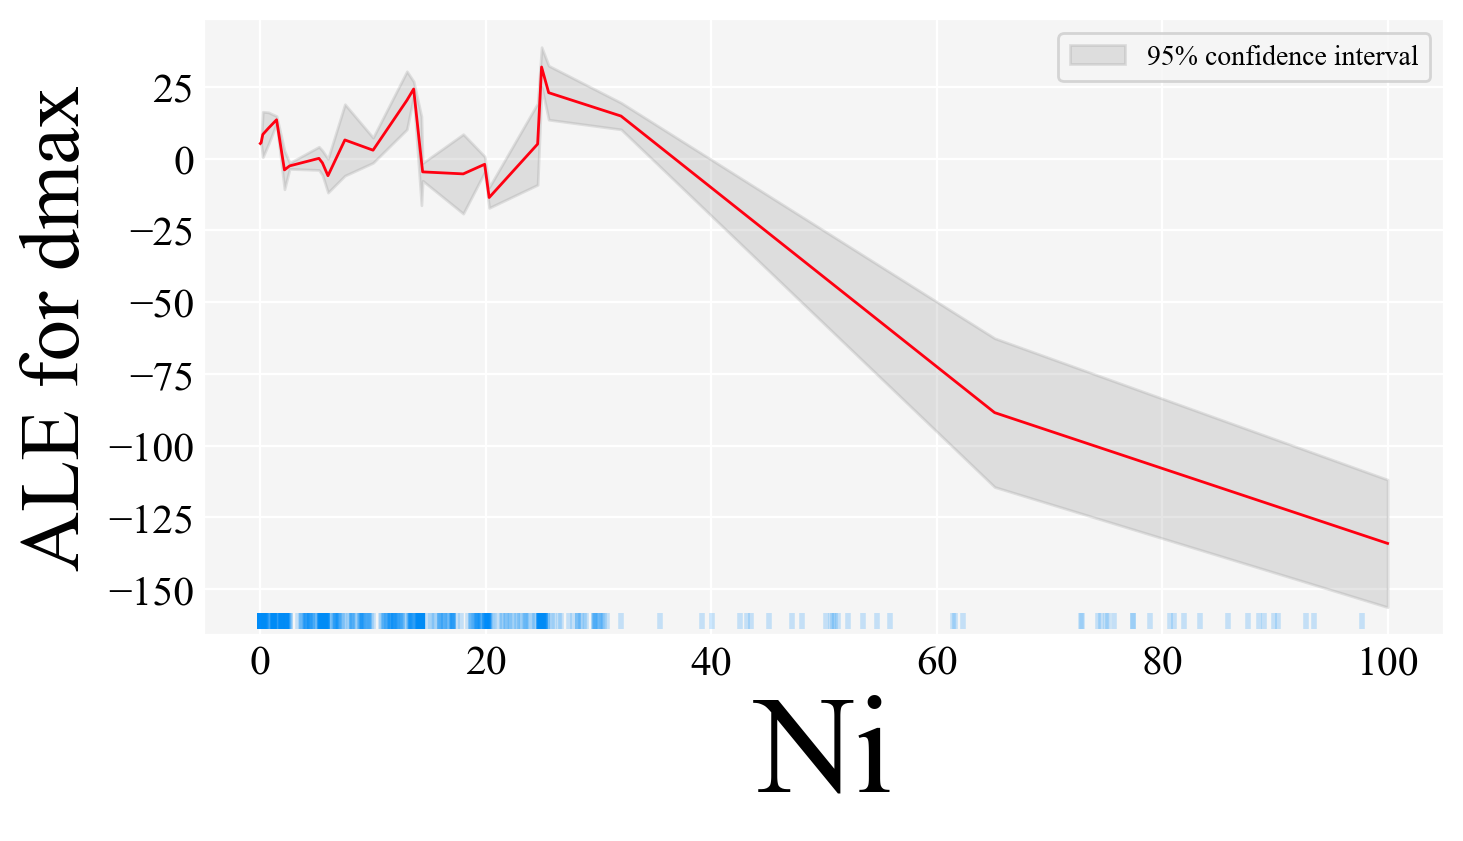

In [108]:
from PyALE import ale
## 1D - continuous - no CI
plt.figure(figsize=(15,15),dpi=400)

from matplotlib import cycler
# cycler
colors = plt.cycler(color=
                ['#FF0011', 'b', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('axes', facecolor='#F5F5F5', edgecolor='w',axisbelow=True, grid=True, prop_cycle=colors)

plt.rc('grid', color='w', linestyle='solid')
plt.rc('patch', edgecolor='#E6E6E6')

plt.rc('xtick', direction='in', color='black')
plt.rc('ytick', direction='in', color='black')
plt.rc('lines', linewidth=1, markeredgewidth=2,markeredgecolor='#008BFB')


ale_eff = ale(
    X=x, model=model, feature=["Ni"], grid_size=30, include_CI=True,C=0.95
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Ni",fontsize=50,color='black')
plt.ylabel("ALE for dmax",fontsize=30,color='black')
plt.title("",fontsize=20)
plt.tick_params(bottom=False, top=False, left=False, right=False)

#plt.savefig('C:\\Users\\1\\Desktop\\wc类.jpg',dpi=400,bbox_inches='tight')
#ale_eff.to_excel('C:\\Users\\Administrator.DESKTOP-L29CIOJ\\Desktop\\cc.xlsx')




In [109]:
#ale result to excel
'''
name=featurename[:]
name
for i in range(len(name)):
    for j in range(len(name)):
        if i<=j:
            j=j+1
            a=name[i]
            b=name[j]
            print(a,b)
            ale_eff = ale(X=x, model=model1, feature=[a, b],grid_size=30,)
            fil_name='C:\\Users\\Administrator.DESKTOP-L29CIOJ\\Desktop\\二阶交互效应汇总\\'+a+'-'+b+'.xlsx'
            print(fil_name)
            ale_eff.to_excel(fil_name)

'''
featurename

array(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ti', 'T', 'SO4', 'Cl', 'pH', 'Scan Rate', 'S_mix',
       'diff_radius', 'geo_para', 'Material class'], dtype=object)

In [14]:
from matplotlib import cycler
featurename=featurename

# 设置cycler，
colors = plt.cycler(color=
                ['#FF0011', 'b', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
# 设置子图样式
plt.rc('axes', facecolor='#F5F5F5', edgecolor='w',axisbelow=True, grid=True, prop_cycle=colors)
# 设置网格
plt.rc('grid', color='w', linestyle='solid')
plt.rc('patch', edgecolor='#E6E6E6')
# 调整x轴标签样式
plt.rc('xtick', direction='in', color='black')
plt.rc('ytick', direction='in', color='black')
plt.rc('lines', linewidth=1, markeredgewidth=2,markeredgecolor='#008BFB')

name=featurename[:]
name
'''
for i in range(len(name)):
            a=name[i]
            print(a)
            ale_eff = ale(X=x, model=model, feature=[a], grid_size=30, include_CI=True, C=0.95)

            fil_name='C:\\Users\\Administrator.DESKTOP-L29CIOJ\\Desktop\\一阶效应汇总20\\'+a+'.xlsx'
            print(fil_name)
            #ale_eff.to_excel(fil_name)

            #plt.figure(figsize=(15,15),dpi=400)
            #plt.savefig('C:\\Users\\Administrator.DESKTOP-L29CIOJ\\Desktop\\一阶效应汇总20\\'+a+'.jpg',dpi=400,bbox_inches='tight')
'''


"\nfor i in range(22):\n            a=name[i]\n            print(a)\n            ale_eff = ale(X=x, model=model, feature=[a], grid_size=30, include_CI=True, C=0.95)\n\n            fil_name='C:\\Users\\Administrator.DESKTOP-L29CIOJ\\Desktop\\一阶交互效应汇总20\\'+a+'.xlsx'\n            print(fil_name)\n            #ale_eff.to_excel(fil_name)\n\n            #plt.figure(figsize=(15,15),dpi=400)\n            #plt.savefig('C:\\Users\\Administrator.DESKTOP-L29CIOJ\\Desktop\\一阶交互效应汇总20\\'+a+'.jpg',dpi=400,bbox_inches='tight')\n"

Text(0.5, 0, 'mean(|SHAP value|)')

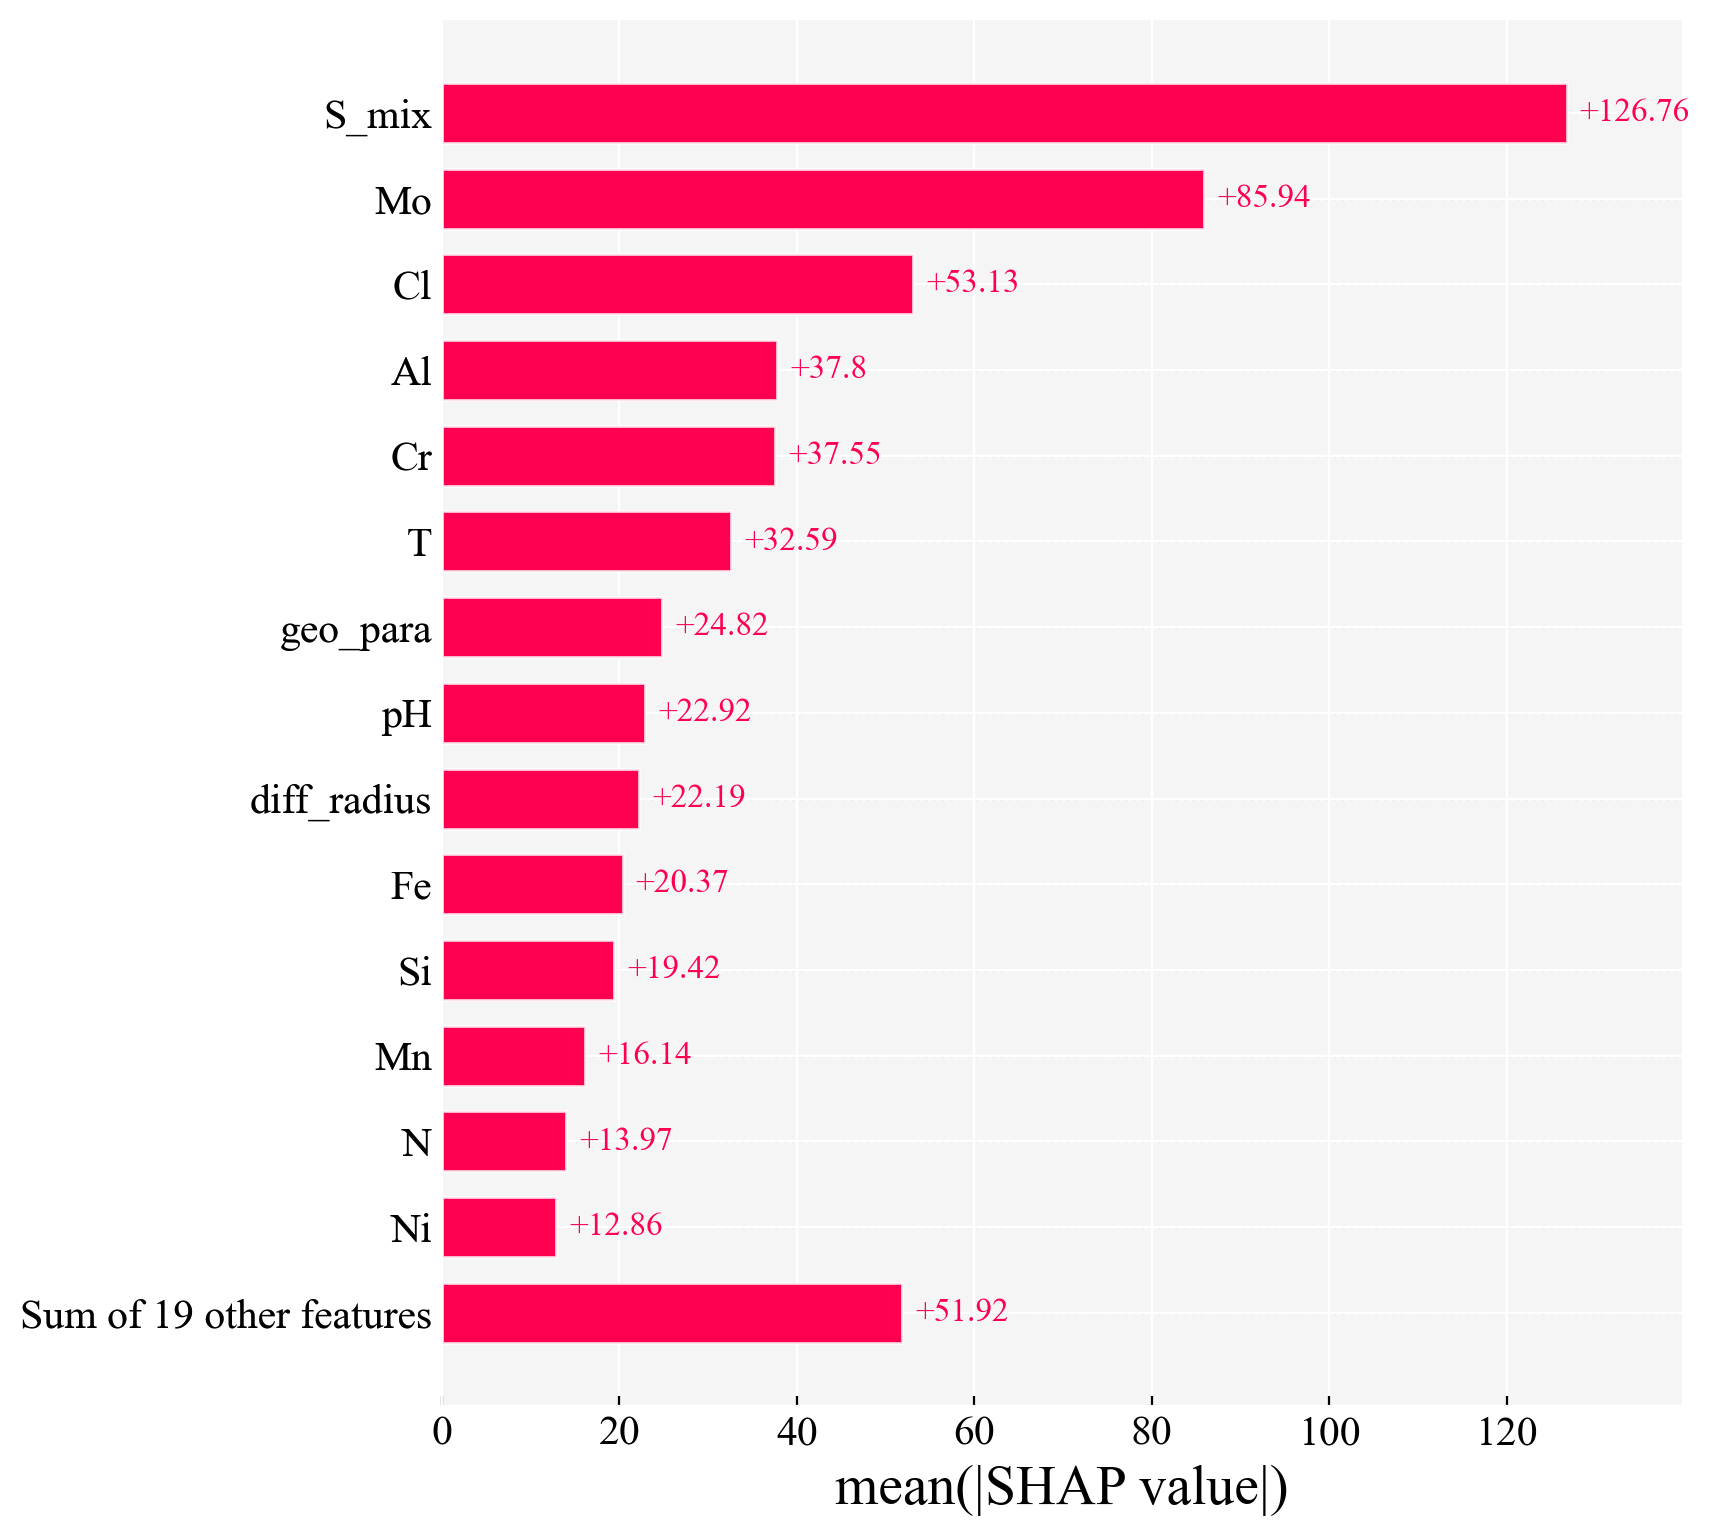

In [15]:
shap.plots.bar(shap_values,15,show=False,)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("mean(|SHAP value|)",fontsize=20,color='black')

#plt.savefig('C:\\Users\\1\\Desktop\\重要性.jpg',dpi=400,bbox_inches='tight')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


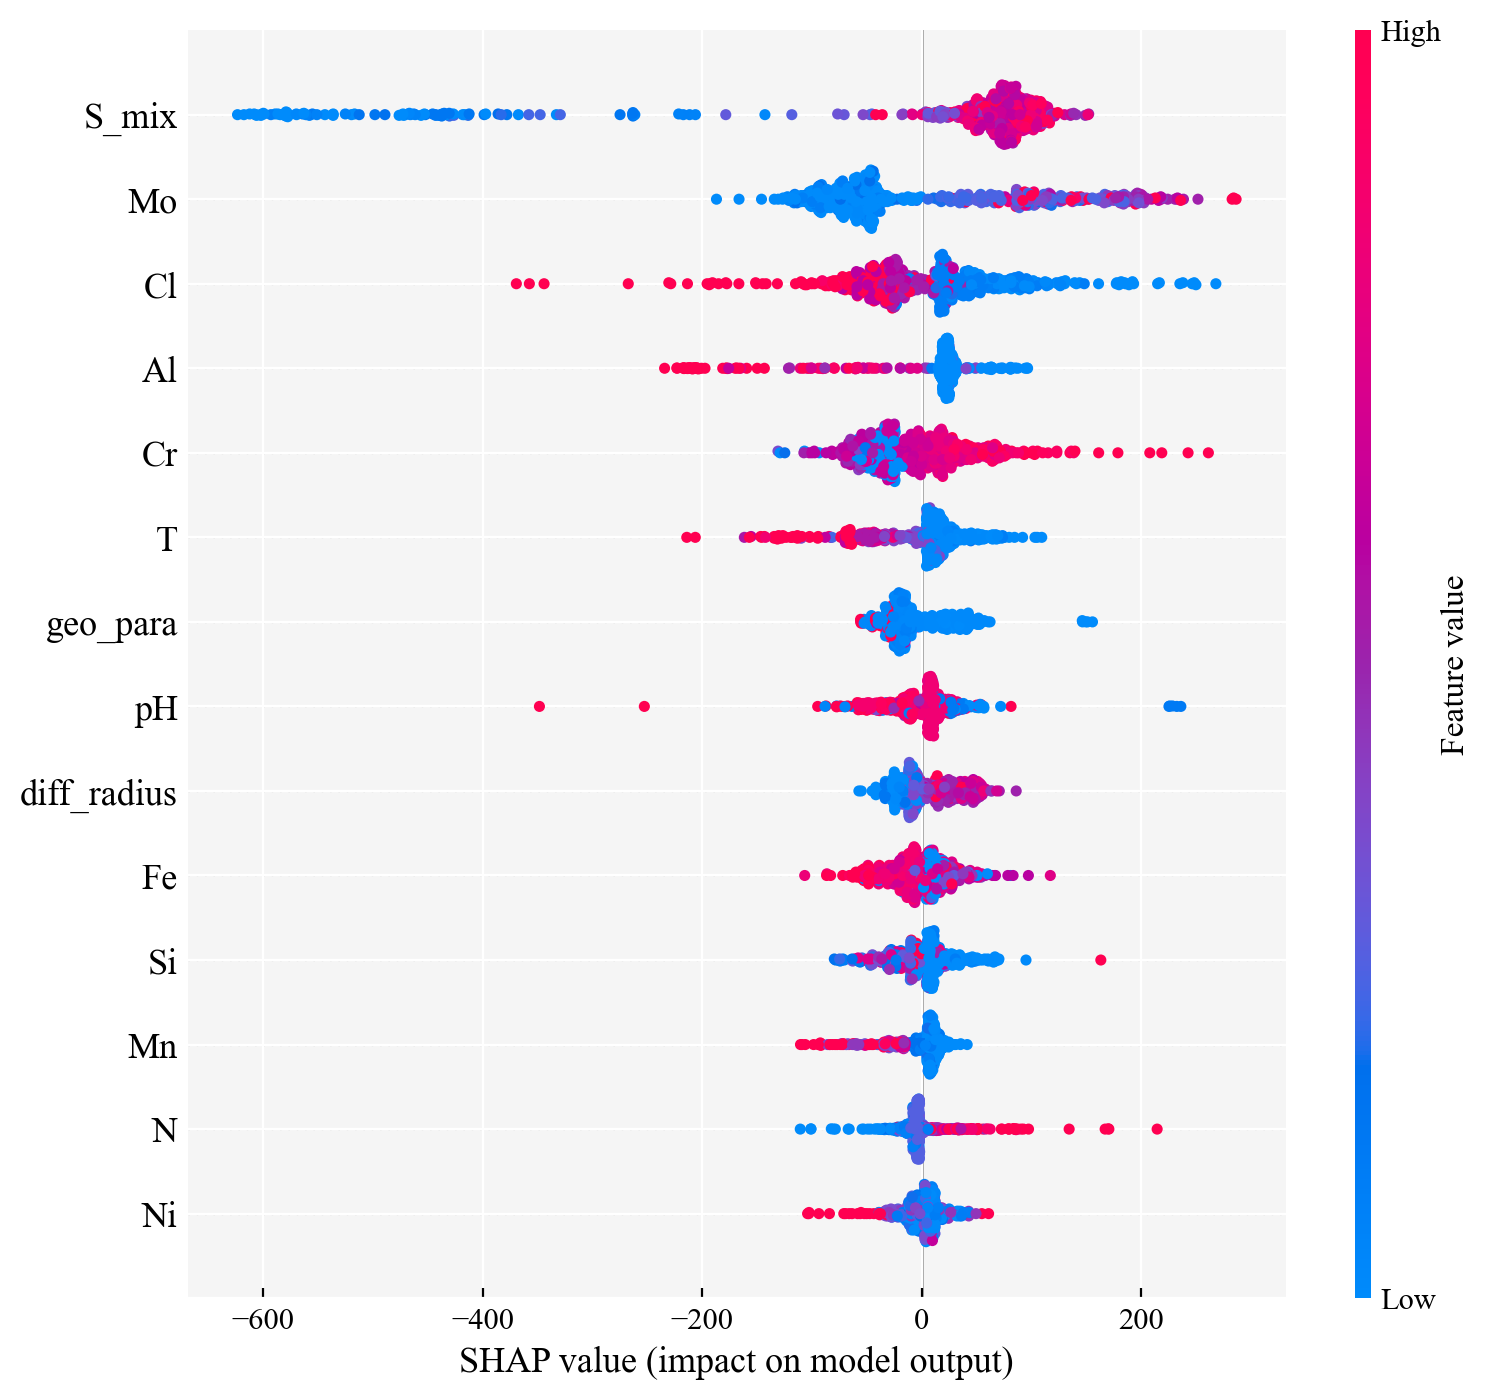

In [16]:
#小提琴图
#shap.summary_plot(shap_values, x,max_display=14, plot_type="violin",axis_color='black',show=False,)
shap.summary_plot(shap_values, x,max_display=14,axis_color='black',show=False,)

#plt.savefig('C:\\Users\\1\\Desktop\\xiaotiqin.jpg',dpi=400,bbox_inches='tight')

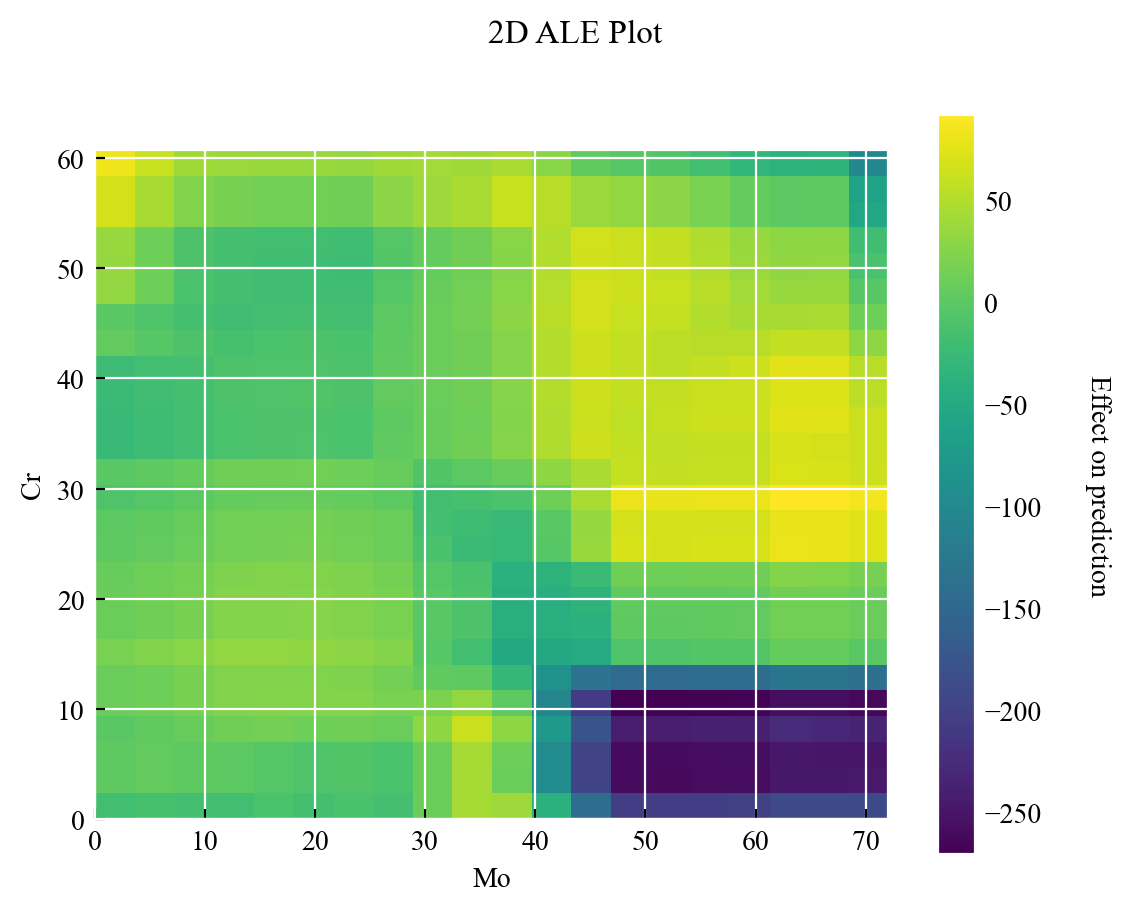

In [17]:

ale_eff = ale(X=x, model=model, feature=["Cr", 'Mo'],grid_size=30,)

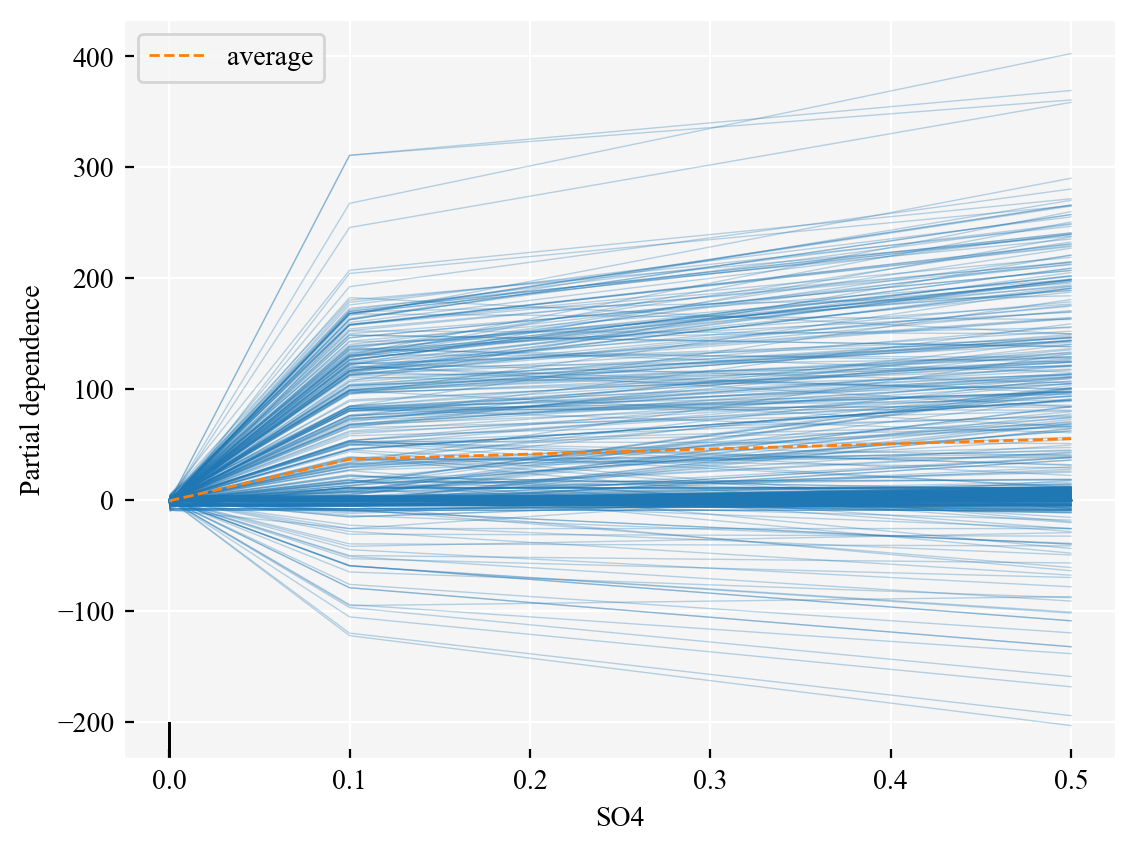

In [32]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
pd_results=partial_dependence(model, X_train,['Cl'])

features_info = {
    "features": ['SO4'],
    "kind": "both",
    "centered": True,
}
display = PartialDependenceDisplay.from_estimator(
   model,
    X_train,
    **features_info,
    percentiles=(0, 1),
    grid_resolution=100,
)

#plt.savefig('C:\\Users\\1\\Desktop\\SO4.jpg',dpi=400,bbox_inches='tight')


In [21]:
#输出ICE的数据
pdp=partial_dependence(model,X_train,['diff_radius'],kind="both",percentiles=(0, 1))
pdf=display.pd_results

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
type(pdp)
pdp["average"]
aver=pdp["average"]
aver=pd.DataFrame(aver).T

pdp["values"]
values=pdp["values"]
values=pd.DataFrame(values).T


a=pdp["individual"]
type(a)
print(np.shape(a))
a.reshape(540,100)
df = pd.DataFrame(a.reshape(540,100))
df=df.T
#转置

df["average"]=aver
df["values"]=values

a=df.loc[0]
#df.to_excel('C:\\Users\\1\\Desktop\\Ni.xlsx')
df=df-a
df

#df.to_excel('C:\\Users\\1\\Desktop\\diff_radius.xlsx')



(1, 540, 100)


In [ ]:
pdp


In [ ]:
a='4'
b=int(a)
type(b)